### **Notebook 2: "Canada Fire Weather Climate Data Analysis"**
🔹 **Purpose:**
- Uses **Fire Weather Index (BUI - Build-Up Index)** to analyze **climate-driven wildfire risk**.
- Loads **NetCDF (Xarray) climate datasets** from Canada’s climate repositories.
- Extracts geospatial data (**longitude, latitude, fire risk score**) for **climate risk mapping**.
- Creates **geospatial maps** of wildfire risk levels.

🔹 **How It Relates to Mortgage Insurance Risk:**
- **High wildfire risk can increase property loss probability**, affecting **Loss Given Default (LGD)**.
- **Mortgage portfolios in high-risk zones** need **climate stress testing**.
- Helps insurance underwriters & banks assess **regional risks due to climate change**.

🔹 **Limitations:**
- No **integration with actual mortgage loan data** (loan ID, property value, PD, LGD).
- No **risk model linking climate risk to financial metrics** (Expected Loss, PD, LGD).
- No **machine learning models to forecast risk trends**.

---

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import xarray as xr
import pandas as pd

file_path = '/content/gdrive/My Drive/Colab Notebooks/Haventree Bank/Fire Climate/May_to_September_95th_percentile_of_BUI_RCP4.5_2041-2070_.nc'

#file_path = '/content/gdrive/My Drive/Colab Notebooks/Haventree Bank/Fire Climate/May_to_September_95th_percentile_of_BUI_RCP8.5_2041-2070_percentage_change_from_1971-2000.nc'
ds = xr.open_dataset(file_path)

df = ds.to_dataframe().reset_index()
print(df.head())

          lon        lat  BUI     period ensemble_statistic  annual_quantiles  \
0 -144.750204  43.127567  NaN  2041-2070               mean              0.95   
1 -144.750204  43.627160  NaN  2041-2070               mean              0.95   
2 -144.750204  44.126752  NaN  2041-2070               mean              0.95   
3 -144.750204  44.626345  NaN  2041-2070               mean              0.95   
4 -144.750204  45.125938  NaN  2041-2070               mean              0.95   

   spatial_ref  
0            0  
1            0  
2            0  
3            0  
4            0  


In [ ]:
df.head()

,lon,lat,BUI,period,ensemble_statistic,annual_quantiles,spatial_ref
0,-144.750204,43.127567,NaN,2041-2070,mean,0.95,0
1,-144.750204,43.627160,NaN,2041-2070,mean,0.95,0
2,-144.750204,44.126752,NaN,2041-2070,mean,0.95,0
3,-144.750204,44.626345,NaN,2041-2070,mean,0.95,0
4,-144.750204,45.125938,NaN,2041-2070,mean,0.95,0


In [ ]:
df.tail()

,lon,lat,BUI,period,ensemble_statistic,annual_quantiles,spatial_ref
12345,-50.327213,73.103120,NaN,2041-2070,mean,0.95,0
12346,-50.327213,73.602712,NaN,2041-2070,mean,0.95,0
12347,-50.327213,74.102305,NaN,2041-2070,mean,0.95,0
12348,-50.327213,74.601897,NaN,2041-2070,mean,0.95,0
12349,-50.327213,75.101490,NaN,2041-2070,mean,0.95,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12350 entries, 0 to 12349
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lon                 12350 non-null  float64
 1   lat                 12350 non-null  float64
 2   BUI                 4776 non-null   float32
 3   period              12350 non-null  object 
 4   ensemble_statistic  12350 non-null  object 
 5   annual_quantiles    12350 non-null  float64
 6   spatial_ref         12350 non-null  int32  
dtypes: float32(1), float64(3), int32(1), object(2)
memory usage: 579.0+ KB


In [ ]:
ds.dims

FrozenMappingWarningOnValuesAccess({'lon': 190, 'lat': 65})

In [ ]:
ds.coords

Coordinates:
  * lon                 (lon) float64 2kB -144.8 -144.3 -143.8 ... -50.83 -50.33
  * lat                 (lat) float64 520B 43.13 43.63 44.13 ... 74.1 74.6 75.1
    period              object 8B '2041-2070'
    ensemble_statistic  object 8B 'mean'
    annual_quantiles    float64 8B 0.95

In [ ]:
ds.data_vars

Data variables:
    BUI          (lat, lon) float32 49kB nan nan nan nan nan ... nan nan nan nan
    spatial_ref  int32 4B 0

In [ ]:
# View the dataset structure and metadata
print(ds)

# List of variables in the dataset
print(ds.variables)

# Access specific variables
bui_data = ds['BUI']  # Replace 'BUI' with the actual variable name if different

# Print the variable details
print(bui_data)

<xarray.Dataset> Size: 51kB
Dimensions:             (lon: 190, lat: 65)
Coordinates:
  * lon                 (lon) float64 2kB -144.8 -144.3 -143.8 ... -50.83 -50.33
  * lat                 (lat) float64 520B 43.13 43.63 44.13 ... 74.1 74.6 75.1
    period              object 8B '2041-2070'
    ensemble_statistic  object 8B 'mean'
    annual_quantiles    float64 8B 0.95
Data variables:
    BUI                 (lat, lon) float32 49kB nan nan nan nan ... nan nan nan
    spatial_ref         int32 4B 0
Attributes: (12/40)
    Conventions:                                    CF-1.8
    institution:                                    Canadian Centre for Clima...
    institute_id:                                   CCCS/ECCC
    contact:                                        ccsc-cccs@ec.gc.ca
    domain:                                         Canada land areas, exclud...
    creation_date:                                  2024-05-29 22:32:45 UTC
    ...                                       

In [ ]:
# Convert the variable data to a numpy array
bui_values = bui_data.values

print(bui_values.shape)
print(bui_values)

# Convert to DataFrame
df = ds.to_dataframe().reset_index()
print(df.head())

(65, 190)
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
          lon        lat  BUI     period ensemble_statistic  annual_quantiles  \
0 -144.750204  43.127567  NaN  2041-2070               mean              0.95   
1 -144.750204  43.627160  NaN  2041-2070               mean              0.95   
2 -144.750204  44.126752  NaN  2041-2070               mean              0.95   
3 -144.750204  44.626345  NaN  2041-2070               mean              0.95   
4 -144.750204  45.125938  NaN  2041-2070               mean              0.95   

   spatial_ref  
0            0  
1            0  
2            0  
3            0  
4            0  


## Distribution Plot of BUI

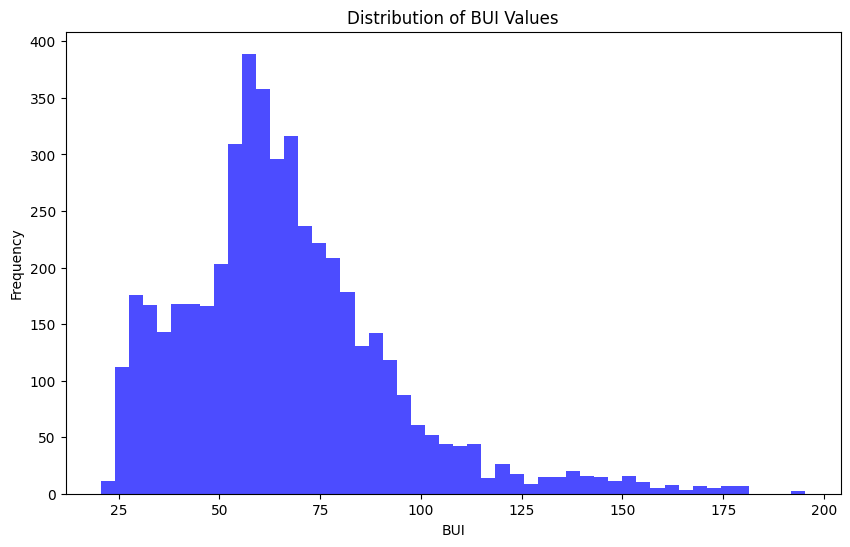

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(bui_values.flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Distribution of BUI Values')
plt.xlabel('BUI')
plt.ylabel('Frequency')
plt.show()

## Geographical Maps

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


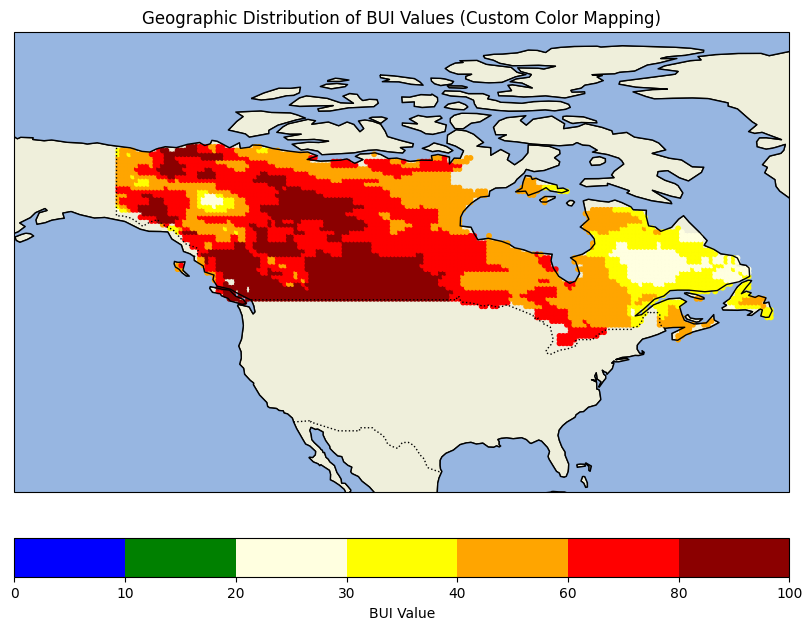

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

# Extract longitude, latitude, and BUI data
lons = df['lon']
lats = df['lat']
bui_values = df['BUI']

# Set up the map projection and figure with a taller aspect ratio
fig = plt.figure(figsize=(10, 12))  # Taller aspect ratio
ax = plt.axes(projection=ccrs.PlateCarree())

# Set latitude and longitude limits to adjust the height
ax.set_extent([lons.min()-10, lons.max(), lats.min()-20, lats.max()+10], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Define custom colormap and boundaries
cmap = ListedColormap(['blue', 'green', 'lightyellow', 'yellow', 'orange', 'red', 'darkred'])
bounds = [0, 10, 20, 30, 40, 60, 80, 100]
norm = BoundaryNorm(bounds, cmap.N)

# Plot the BUI data with the custom colormap
scatter = ax.scatter(lons, lats, c=bui_values, cmap=cmap, norm=norm, s=10, transform=ccrs.PlateCarree())

cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05, boundaries=bounds, cmap=cmap, norm=norm)
cbar.set_label('BUI Value')

ax.set_title('Geographic Distribution of BUI Values (Custom Color Mapping)')

plt.show()

In [ ]:
! pip install cartopy


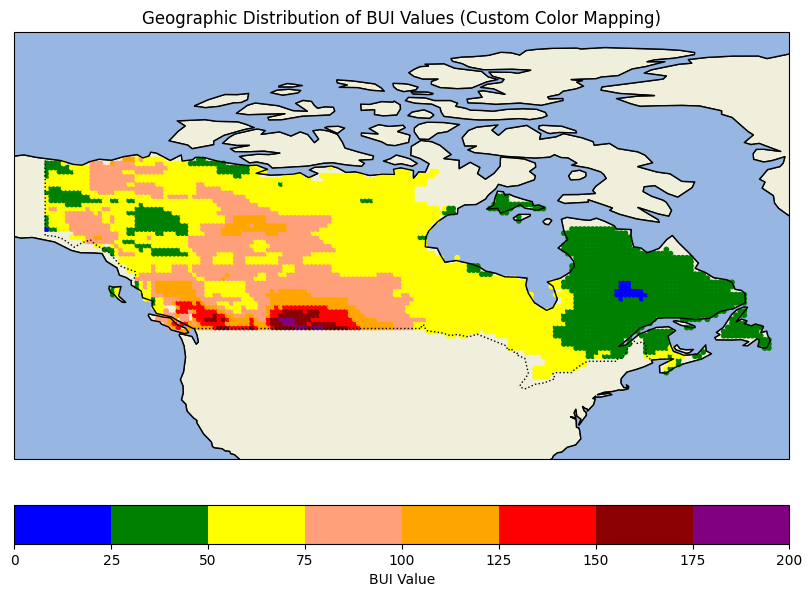

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap, BoundaryNorm

# Extract longitude, latitude, and BUI data
lons = df['lon']
lats = df['lat']
bui_values = df['BUI']

# Set up the map projection and figure with a taller aspect ratio
fig = plt.figure(figsize=(10, 12))  # Taller aspect ratio
ax = plt.axes(projection=ccrs.PlateCarree())

# Set latitude and longitude limits to adjust the height
ax.set_extent([lons.min(), lons.max(), lats.min()-10, lats.max()+10], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Define custom colormap and boundaries
cmap = ListedColormap(['blue', 'green', 'yellow', 'lightsalmon', 'orange', 'red', 'darkred', 'purple'])
bounds = [0, 25, 50, 75, 100, 125, 150, 175, 200]
norm = BoundaryNorm(bounds, cmap.N)

# Plot the BUI data with the custom colormap
scatter = ax.scatter(lons, lats, c=bui_values, cmap=cmap, norm=norm, s=10, transform=ccrs.PlateCarree())

cbar = plt.colorbar(scatter, ax=ax, orientation='horizontal', pad=0.05, boundaries=bounds, cmap=cmap, norm=norm)
cbar.set_label('BUI Value')

ax.set_title('Geographic Distribution of BUI Values (Custom Color Mapping)')

plt.show()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


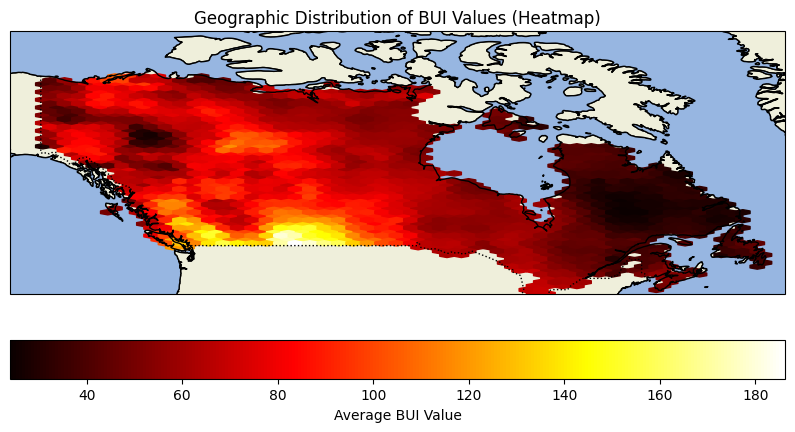

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import cm
import numpy as np

# Set up the map projection and figure
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set latitude and longitude limits
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Create a heatmap
heatmap = ax.hexbin(lons, lats, C=bui_values, gridsize=50, cmap='hot', reduce_C_function=np.mean)

cbar = plt.colorbar(heatmap, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Average BUI Value')

ax.set_title('Geographic Distribution of BUI Values (Heatmap)')

plt.show()

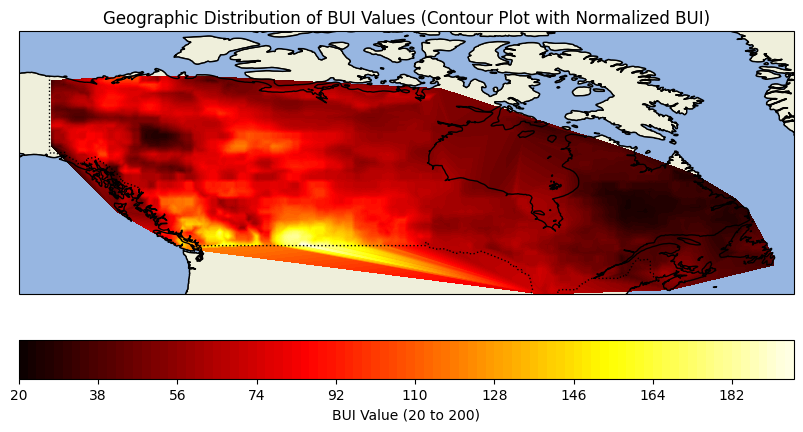

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import Normalize

# Extract longitude, latitude, and BUI data
lons = df['lon']
lats = df['lat']
bui_values = df['BUI']

# Filter out non-finite BUI values (e.g., NaN or inf)
finite_mask = np.isfinite(bui_values)
lons_finite = lons[finite_mask]
lats_finite = lats[finite_mask]
bui_values_finite = bui_values[finite_mask]

# Set up the map projection and figure
fig = plt.figure(figsize=(10, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# Set latitude and longitude limits
ax.set_extent([lons.min(), lons.max(), lats.min(), lats.max()], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Normalize the BUI values to be between 20 and 200
norm = Normalize(vmin=20, vmax=200)

# Create a contour plot with normalization
contour = ax.tricontourf(lons_finite, lats_finite, bui_values_finite, levels=100, cmap='hot', norm=norm)

cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('BUI Value (20 to 200)')

ax.set_title('Geographic Distribution of BUI Values (Contour Plot with Normalized BUI)')

plt.show()

In [ ]:
df.head()

,lon,lat,BUI,period,ensemble_statistic,annual_quantiles,spatial_ref
0,-144.750204,43.127567,NaN,2041-2070,mean,0.95,0
1,-144.750204,43.627160,NaN,2041-2070,mean,0.95,0
2,-144.750204,44.126752,NaN,2041-2070,mean,0.95,0
3,-144.750204,44.626345,NaN,2041-2070,mean,0.95,0
4,-144.750204,45.125938,NaN,2041-2070,mean,0.95,0


In [ ]:
ds

<xarray.Dataset> Size: 51kB
Dimensions:             (lon: 190, lat: 65)
Coordinates:
  * lon                 (lon) float64 2kB -144.8 -144.3 -143.8 ... -50.83 -50.33
  * lat                 (lat) float64 520B 43.13 43.63 44.13 ... 74.1 74.6 75.1
    period              object 8B '2041-2070'
    ensemble_statistic  object 8B 'mean'
    annual_quantiles    float64 8B 0.95
Data variables:
    BUI                 (lat, lon) float32 49kB nan nan nan nan ... nan nan nan
    spatial_ref         int32 4B 0
Attributes: (12/40)
    Conventions:                                    CF-1.8
    institution:                                    Canadian Centre for Clima...
    institute_id:                                   CCCS/ECCC
    contact:                                        ccsc-cccs@ec.gc.ca
    domain:                                         Canada land areas, exclud...
    creation_date:                                  2024-05-29 22:32:45 UTC
    ...                                             ...
    CanLEAD_CanRCM4_bc_observation:                 EartH2Observe, WFDEI and ...
    CanLEAD_CanRCM4_bc_period:                      1981-2010
    CanLEAD_CanRCM4_references:                     http://www.cccma.ec.gc.ca...
    CanLEAD_CanRCM4_institution:                    Environment and Climate C...
    CanLEAD_CanRCM4_institute_id:                   ECCC
    rcp:                                            Constructed RCP4.5

## Another Type of Geographical Plot

In [ ]:
!pip install cartopy
import cartopy

In [ ]:
# Check the minimum value of BUI
min_bui = df['BUI'].min()

max_bui = df['BUI'].max()

print(f"Minimum BUI value: {min_bui}")
print(f"Maximum BUI value: {max_bui}")

Minimum BUI value: 20.570322036743164
Maximum BUI value: 195.39479064941406


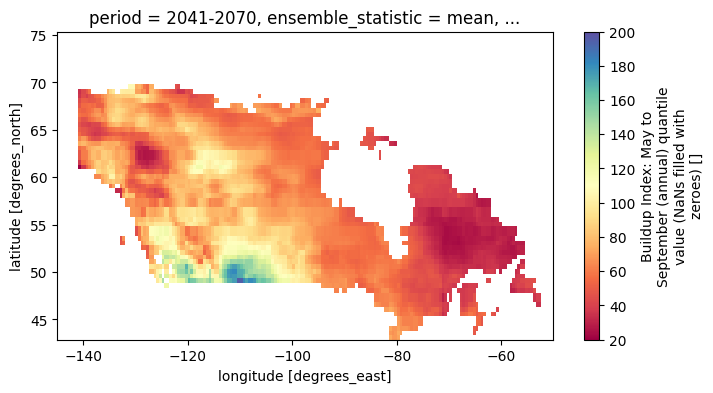

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize

# Assuming you want to plot a specific variable, for example, 'BUI'
variable_to_plot = ds['BUI']

# Set up normalization with the specified range from 20 to 200
norm = Normalize(vmin=20, vmax=200)

variable_to_plot.plot.imshow(figsize=(8, 4), cmap='Spectral', norm=norm)

plt.show()

### **Enhancements for Wildfire Risk (Fire Climate Data Notebook)**
 **Geospatial Mortgage Risk Mapping:**
- Merge **loan property locations** with wildfire risk scores from climate data.

 **Bayesian Updating for Risk Prediction:**
- Use **Bayesian Inference** to update **mortgage risk scores** dynamically as **OSFI changes climate risk factors**.

 **Machine Learning for Predictive Risk Modeling:**
- Train an **XGBoost or Random Forest model** to predict the impact of wildfires on **mortgage default rates**.

### **B. Wildfire Risk Prediction Using Bayesian Updating**
This improves **the Fire Climate Notebook** by predicting how **wildfire risk affects mortgage default rates** dynamically.

```python
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Prior belief: Default Probability (PD) based on historical data
prior_alpha = 3  # Prior observed defaults
prior_beta = 20  # Prior observed non-defaults

# New wildfire data (OSFI updates climate risk scores)
new_fires = 7  # New observed property losses due to wildfires
new_no_fires = 25  # Safe properties

# Update Bayesian model
updated_alpha = prior_alpha + new_fires
updated_beta = prior_beta + new_no_fires

# Simulate Posterior Distribution
with pm.Model():
    pd_posterior = pm.Beta("pd_posterior", alpha=updated_alpha, beta=updated_beta)
    trace = pm.sample(1000, return_inferencedata=True)

# Extract samples
pd_samples = trace.posterior["pd_posterior"].values.flatten()

# Plot Bayesian posterior distribution
sns.histplot(pd_samples, kde=True)
plt.xlabel("Updated Probability of Default (PD)")
plt.ylabel("Density")
plt.title("Bayesian Update on PD After OSFI Climate Policy Change")
plt.show()
```
**Improvement:** This **dynamically updates mortgage risk probabilities** as **climate risks change**.